<a href="https://colab.research.google.com/github/fitrianamasruroh/cnn/blob/cnn%2Fface_shape/Kernel_SVM_k_fold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from matplotlib.colors import ListedColormap

In [ ]:
# Importing the dataset 
dataset = pd.read_csv('/content/sample_data/Iris2.csv') 

In [ ]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Splitting the dataset into Training set and Test set 
from sklearn.model_selection import train_test_split 

# Split into training data and test data
X = dataset[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = dataset['Species']

#X = dataset[['Kelengkapan','Umur',	'Status',	'pendidikan',	'jurusan',	'sertifikat',	'Pengalaman',	'IPK','TPA']]
#y = dataset['Lolos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print('Jumlah Dataset:', len(dataset))
print('X_train:', len(X_train), 'y_train:', len(y_train))
print('X_test:', len(X_test), 'y_tes:', len(y_test))

Jumlah Dataset: 100
X_train: 75 y_train: 75
X_test: 25 y_tes: 25


In [ ]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [ ]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

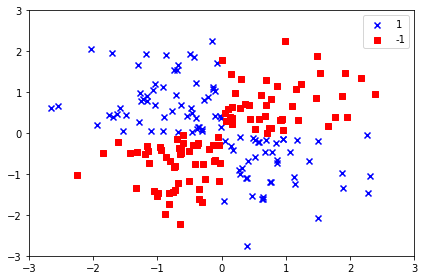

In [ ]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
# Fitting Kernel SVM to the Training set 
from sklearn.svm import SVC 
classifier = SVC(kernel = 'rbf', random_state = 0, gamma=.01, C=1) 
classifier.fit(X_train, y_train) 


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# Fitting Kernel SVM to the Training set 
from sklearn.svm import SVC 
classifier = SVC(gamma='auto') 
classifier.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Fitting Kernel SVM to the Training set 
from sklearn.svm import SVC 
classifier = SVC(kernel='poly', degree=3, C=1.0, gamma = 'auto') 
classifier.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Predicting the Test set results 
y_pred = classifier.predict(X_test)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


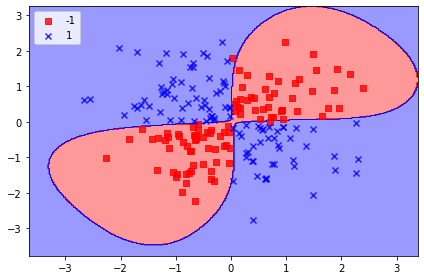

In [ ]:
# Train the classifier
classifier.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision_regions(X_xor, y_xor, classifier=classifier)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Making the Confusion Matrix 
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

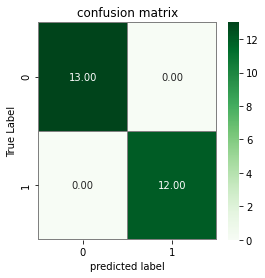

In [ ]:
confusion_mtx = confusion_matrix(y_test, y_pred)
f,ax = plt.subplots(figsize = (4,4))
sns.heatmap(confusion_mtx,annot=True,linewidths = 0.01,cmap="Greens",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()


In [ ]:
print("Classifiction Report :")
print(classification_report(y_test, y_pred))

Classifiction Report :
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        12

       accuracy                           1.00        25
      macro avg       1.00      1.00      1.00        25
   weighted avg       1.00      1.00      1.00        25



In [ ]:
# Applying k-Fold Cross Validation 
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, scoring='accuracy')


In [ ]:
print(accuracies)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(classifier, X, y, cv=10, scoring=scoring)
sorted(scores.keys())

['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']

In [ ]:
scores['test_recall_macro']

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
scores['test_precision_macro']

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (accuracies.mean(), accuracies.std()))

1.00 accuracy with a standard deviation of 0.00


In [ ]:
# Pickle model 
pd.to_pickle(classifier,r'/content/sample_data/model.pickle')

# Unpickle model 
classifier = pd.read_pickle(r'/content/sample_data/model.pickle') 
# read a pickle pd.read_pickle('model.pkl')

In [ ]:
# Take input from user
SepalLengthCm = float(input("Enter sepal_length: "))
SepalWidthCm = float(input("Enter sepa_width: "))
PetalLengthCm = float(input("Enter petal_length: "))
PetalWidthCm = float(input("Enter petal_width: "))

result =classifier.predict([[SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm]])
print(result)

Enter sepal_length: 1
Enter sepa_width: 1
Enter petal_length: 1
Enter petal_width: 1


ValueError: ignored

In [ ]:
# Take input from user
Kelengkapan = input("Enter Kelengkapan: ")
Umur = input("Enter Umur: ")
Status = input("Enter Status: ")
pendidikan = input("Enter pendidikan: ")
jurusan = input("Enter jurusan: ")
sertifikat = input("Enter sertifikat: ")
Pengalaman = input("Enter Pengalaman: ")
IPK = input("Enter IPK: ")
TPA = input("Enter TPA: ")

Hasil =classifier.predict([[Kelengkapan, Umur,Status,pendidikan,jurusan,sertifikat,Pengalaman,IPK,TPA]])
print(Hasil)

Enter Kelengkapan: 1
Enter Umur: 1
Enter Status: 1
Enter pendidikan: 1
Enter jurusan: 1
Enter sertifikat: 1
Enter Pengalaman: 1
Enter IPK: 1
Enter TPA: 1


ValueError: ignored

In [ ]:
1